Number 1:

In [1]:
import numpy as np
a=np.random.random((10,3))
print(a)
print(a[np.arange(10),np.argmin(np.abs(a - 0.5),axis = 1)])

[[0.29177891 0.00101839 0.54482346]
 [0.94154661 0.9493002  0.51664775]
 [0.57262873 0.98982617 0.03119547]
 [0.68981085 0.47710474 0.82765739]
 [0.48188072 0.73367269 0.94385882]
 [0.31793904 0.45946781 0.40849097]
 [0.93591694 0.99493004 0.73766182]
 [0.30660809 0.4049565  0.85606995]
 [0.44688269 0.25017504 0.10881459]
 [0.38562281 0.25690659 0.50016576]]
[0.54482346 0.51664775 0.57262873 0.47710474 0.48188072 0.45946781
 0.73766182 0.4049565  0.44688269 0.50016576]


Number 2:

In [2]:
import numpy as np
a=np.random.random((6,6))
print(a)
b=np.sum(a,axis=1)
print(b)
c=np.min(a,axis=0)
print(c)
print(b/c)

[[0.08073441 0.46228107 0.59073124 0.51838978 0.69567885 0.55467208]
 [0.46817483 0.06121557 0.41830803 0.93030921 0.75617955 0.60211017]
 [0.41649288 0.90536664 0.91287559 0.01622472 0.88588106 0.74074484]
 [0.39083997 0.90412683 0.72608722 0.06023187 0.26569861 0.16152805]
 [0.69625543 0.60309367 0.42834339 0.32261054 0.92632939 0.58782695]
 [0.70176617 0.40180777 0.45652663 0.15587653 0.62761573 0.20694911]]
[2.90248743 3.23629735 3.87758573 2.50851255 3.56445936 2.55054194]
[0.08073441 0.06121557 0.41830803 0.01622472 0.26569861 0.16152805]
[ 35.95105636  52.86722478   9.26969002 154.61054995  13.41542358
  15.79008638]


Number 3:

In [4]:
import numpy as np
x=np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(np.max(x[1:][(x==0)[:-1]]))

5


Number 4:

In [2]:
import numpy as np
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x + np.bincount(i, minlength = len(x))

array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

Number 5:

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
def data_st(matrix): 
    n = matrix.shape[1] 
    m = matrix.shape[0]
    means = np.mean(matrix, axis=0)
    dev = np.std(matrix, axis = 0)
    matrix = matrix - means
    matrix = np.divide(matrix, dev)
    return matrix

def reevaluate_centroids(obs, centroids, k):
    new_centroids = np.empty((len(centroids),len(centroids[0])))
    distortion = distance.cdist(obs, centroids, 'sqeuclidean')
    mat = np.hstack((obs, distortion.argmin(axis=1).reshape(len(distortion),1)))
    for i in range(len(centroids)):
        new_centroids[i] = np.vstack(row for row in mat if row[-1] == i).mean(axis=0)[:-1]
    return new_centroids 

def compute_distort(obs, centroids, k):
    D = distance.cdist(obs, centroids, 'euclidean')
    return sum(np.min(D, axis=1))

def k_means(obs, k, thresh):
    if type(k) == int:
        centroids = obs[np.random.choice(range(len(obs)), k, False)]
    else:
        centroids = k
    prev_d = -1
    cur_d = compute_distort(obs, centroids, k)
    while abs(cur_d - prev_d) > thresh:
        centroids = reevaluate_centroids(obs, centroids, k)
        prev_d = cur_d
        cur_d = compute_distort(obs, centroids, k)
    return centroids, cur_d

def elbow_method(obs, thresh):
    distortions = []
    K = range(1, 16)
    for k in K:
        distortions.append(k_means(obs, k, thresh)[1])
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

Number 6:

Age-Annual Income

<ipython-input-17-6f6c2232b7fe>:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_centroids[i] = np.vstack(row for row in mat if row[-1] == i).mean(axis=0)[:-1]


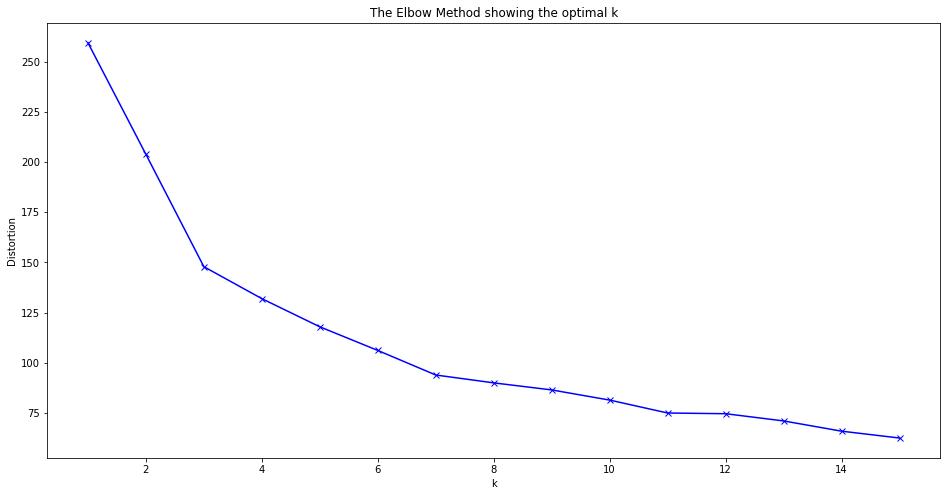

In [18]:
import numpy as np
from scipy.spatial import distance

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
AgeInc = np.zeros((200, 2), dtype=np.float)
AgeInc = AgeInc.astype(float)
for i in range(data.shape[0]):
    AgeInc[i][0] = data[i][2]
    AgeInc[i][1] = data[i][3]
AgeInc = data_st(AgeInc)
elbow_method(AgeInc, 1e-5)

k=3

<ipython-input-17-6f6c2232b7fe>:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_centroids[i] = np.vstack(row for row in mat if row[-1] == i).mean(axis=0)[:-1]
<ipython-input-19-659fd1a64a97>:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block1 = np.vstack(row for row in matrix if row[-1] == 0)
<ipython-input-19-659fd1a64a97>:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block2 = np.vstack(row for row in matrix if row[-1] == 1)
<ipython-input-19-659fd1a64a97>:6: FutureWarnin

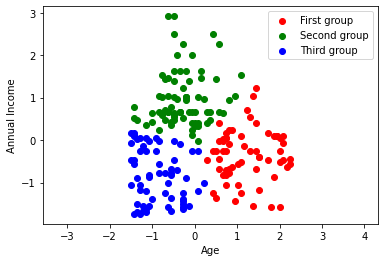

In [19]:
centroids, distort = k_means(AgeInc, 3, 1e-5)
distortion = distance.cdist(AgeInc, centroids, 'sqeuclidean')
matrix = np.hstack((AgeInc, distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)

plt.scatter(block1[:,0], block1[:,1], c='r', label='First group')
plt.scatter(block2[:,0], block2[:,1], c='g', label='Second group')
plt.scatter(block3[:,0], block3[:,1], c='b', label='Third group')
plt.axis('equal')
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.legend()
plt.show()

<ipython-input-17-6f6c2232b7fe>:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_centroids[i] = np.vstack(row for row in mat if row[-1] == i).mean(axis=0)[:-1]


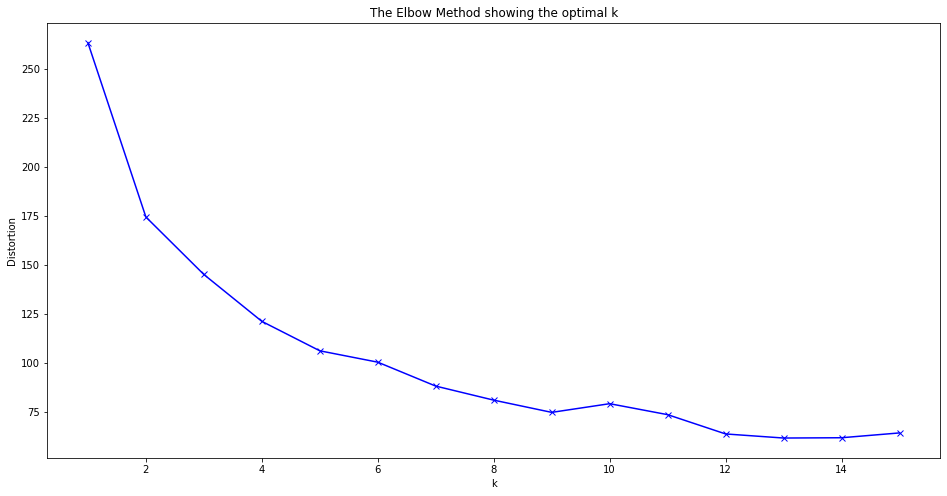

In [20]:
AgeInd = np.zeros((200, 2), dtype=np.float)
AgeInd = AgeInd.astype(float)
for i in range(data.shape[0]):
    AgeInd[i][0] = data[i][2]
    AgeInd[i][1] = data[i][4]
AgeInd = data_st(AgeInd)
elbow_method(AgeInd, 1e-5)

k=2

<ipython-input-17-6f6c2232b7fe>:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_centroids[i] = np.vstack(row for row in mat if row[-1] == i).mean(axis=0)[:-1]
<ipython-input-21-5f52b94adbd1>:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block1 = np.vstack(row for row in matrix if row[-1] == 0)
<ipython-input-21-5f52b94adbd1>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block2 = np.vstack(row for row in matrix if row[-1] == 1)


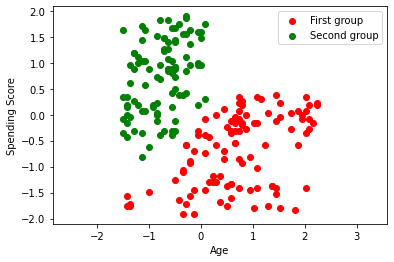

In [21]:
codebook, distor = k_means(AgeInd, 2, 1e-05)

distortion = distance.cdist(AgeInd, codebook, 'sqeuclidean')
matrix = np.hstack((AgeInd, distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)

plt.scatter(block1[:,0], block1[:,1], c='r', label='First group')
plt.scatter(block2[:,0], block2[:,1], c='g', label='Second group')

plt.axis('equal')
plt.xlabel("Age")
plt.ylabel('Spending Score')
plt.legend()
plt.show()

1 group spending score is higher (young people)

Income-Index:

<ipython-input-17-6f6c2232b7fe>:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_centroids[i] = np.vstack(row for row in mat if row[-1] == i).mean(axis=0)[:-1]


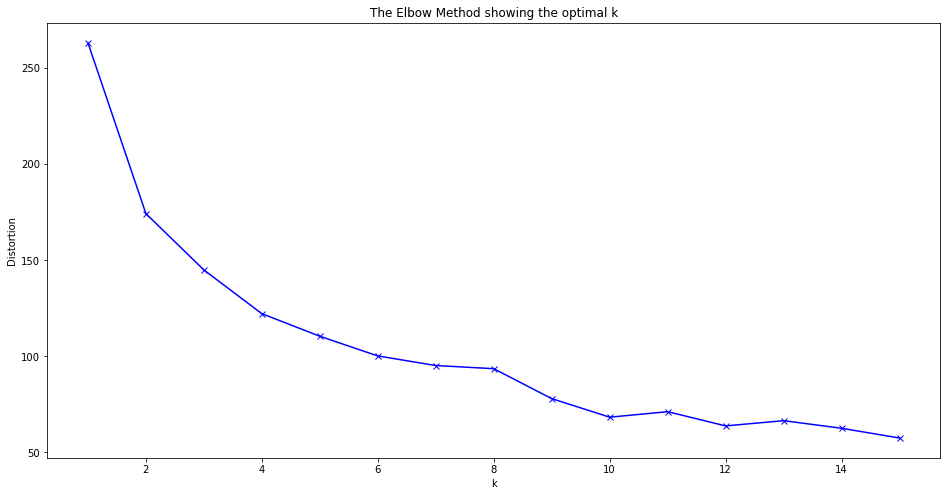

In [22]:
IncInd = np.zeros((200, 2), dtype=np.float)
IncInd = IncInd.astype(float)
for i in range(data.shape[0]):
    IncInd[i][0] = data[i][2]
    IncInd[i][1] = data[i][4]
IncInd = data_st(IncInd)
elbow_method(IncInd, 1e-5)

k=4

<ipython-input-17-6f6c2232b7fe>:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_centroids[i] = np.vstack(row for row in mat if row[-1] == i).mean(axis=0)[:-1]
<ipython-input-24-8eeb0d4cb4e0>:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block1 = np.vstack(row for row in matrix if row[-1] == 0)
<ipython-input-24-8eeb0d4cb4e0>:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block2 = np.vstack(row for row in matrix if row[-1] == 1)
<ipython-input-24-8eeb0d4cb4e0>:6: FutureWarnin

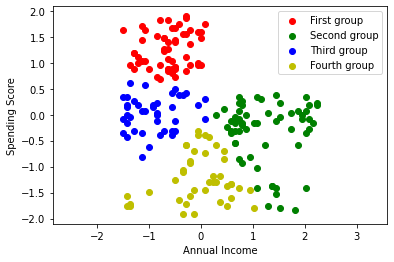

In [24]:
centroids, distort = k_means(IncInd, 4, 1e-05)
distortion = distance.cdist(IncInd, centroids, 'sqeuclidean')
matrix = np.hstack((IncInd, distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)
block4 = np.vstack(row for row in matrix if row[-1] == 3)


plt.scatter(block1[:,0], block1[:,1], c='r', label='First group')
plt.scatter(block2[:,0], block2[:,1], c='g', label='Second group')
plt.scatter(block3[:,0], block3[:,1], c='b', label='Third group')
plt.scatter(block4[:,0], block4[:,1], c='y', label='Fourth group')

plt.axis('equal')
plt.axis('equal')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

There are 5 clusters. The biggest group is a group with middle income and middle spending score. 